#### Načtení modelu

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import normalize
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import random
import numpy as np
from PIL import Image

model = load_model('./20221030_atherosclerosis_model.h5')

In [3]:
def segment_image(img_path):
    img = cv2.imread(img_path, 0)
    img = np.array(img)

    img = np.expand_dims(img, axis=2)
    img = normalize(img, axis=1)

    img_norm = img[:,:,0][:,:,None]
    img_input=np.expand_dims(img_norm, 0)
    prediction=(model.predict(img_input))
    predicted_img=np.argmax(prediction, axis=3)[0,:,:]

    plt.figure(figsize=(12, 8))
    plt.subplot(231)
    plt.title('Testovací obrázek')
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.subplot(232)
    plt.title('Predikce')
    plt.imshow(predicted_img, cmap='gray')
    plt.show()
    return predicted_img

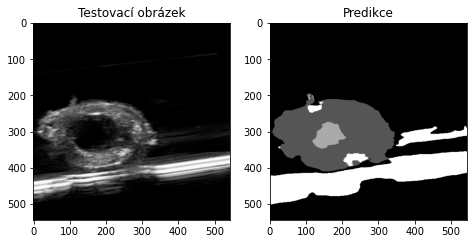

In [43]:
predicted_img = segment_image('../../../../Desktop/Ateroskleroza_Data_Original_26_9_19/Generated_Testing_Images/generated_0_5869.png')


In [10]:
np.max(predicted_img)

3

In [44]:
predicted_img[predicted_img==0] = 0
predicted_img[predicted_img==1] = 50
predicted_img[predicted_img==2] = 150
predicted_img[predicted_img==3] = 250
predicted_img = predicted_img.astype(np.float32)

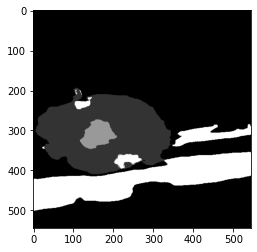

In [21]:
plt.imshow(predicted_img, cmap="gray")

In [16]:
np.max(predicted_img)

250

In [17]:
img = cv2.imread('/Users/davidpilny/Projects/Python/AI_Web_App/segment_app/segment_app/img.jpeg')

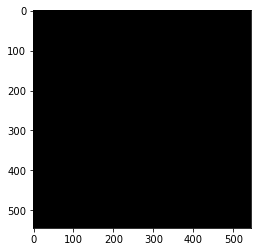

In [19]:
plt.imshow(img,cmap='gray')

In [51]:
im = Image.fromarray(predicted_img, mode="RGBA")
#im.save('img.png')

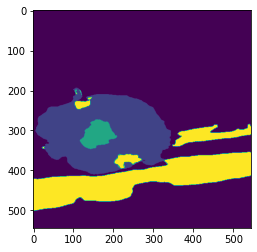

In [37]:
plt.imshow(predicted_img)

In [38]:
plt.imsave("img.jpg", predicted_img)

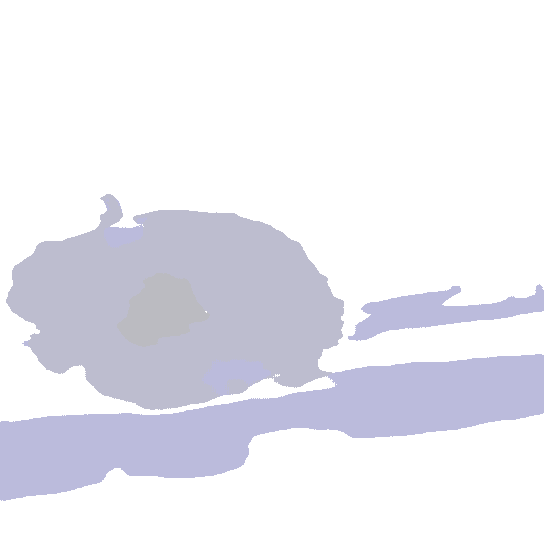

In [52]:
im